PCA with wisconsis dataset

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [23]:
df = pd.read_csv('../Datasets/cases/Wisconsin/BreastCancer.csv', index_col=0)
X = df.drop('Class', axis=1)
y = df['Class']

In [24]:
pca = PCA().set_output(transform='pandas')

X_pca = pca.fit_transform(X)

X.shape, X_pca.shape

((699, 9), (699, 9))

In [25]:
np.cumsum(pca.explained_variance_ratio_) * 100

array([ 68.92148641,  76.17490546,  82.27277194,  86.70847108,
        90.60818755,  94.06577109,  96.59348125,  98.86016534,
       100.        ])

<Axes: xlabel='pca0', ylabel='pca1'>

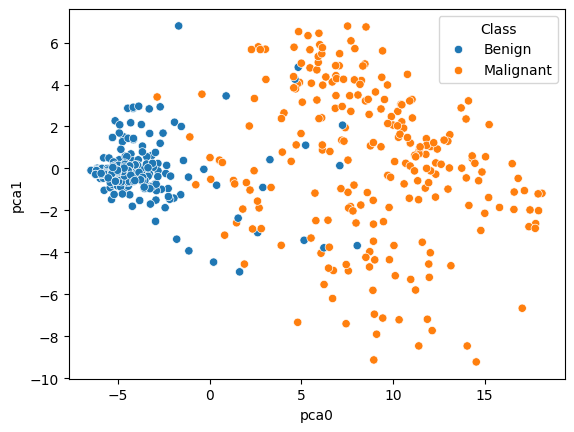

In [26]:
X_pca_copy = X_pca.copy()
X_pca_copy['Class'] = y

import seaborn as sns

sns.scatterplot(data=X_pca_copy, x='pca0', y='pca1', hue='Class')

In [27]:
(X_pca_copy['pca0'].max() - X_pca_copy['pca0'].min()), (X_pca_copy['pca1'].max() - X_pca_copy['pca1'].min())

(np.float64(24.590165428278837), np.float64(16.00945385700512))

## PCA used as transformation for supervised learning

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [30]:
pca = PCA().set_output(transform='pandas')
X_trn_pca  = pca.fit_transform(X_train)
X_trn_pca = X_trn_pca.iloc[:,:3]
X_tst_pca = pca.transform(X_test)
X_tst_pca = X_tst_pca.iloc[:,:3]

svm = SVC(kernel='linear')
svm.fit(X_trn_pca,y_train)
y_pred = svm.predict(X_tst_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       0.98      0.99      0.99       138
   Malignant       0.99      0.96      0.97        72

    accuracy                           0.98       210
   macro avg       0.98      0.98      0.98       210
weighted avg       0.98      0.98      0.98       210



In [ ]:
pca = PCA().set_output(transform='pandas')
X_trn_pca  = pca.fit_transform(X_train)
X_trn_pca = X_trn_pca.iloc[:,:3]
X_tst_pca = pca.transform(X_test)
X_tst_pca = X_tst_pca.iloc[:,:3]

svm = SVC(kernel='linear')
svm.fit(X_trn_pca,y_train)
y_pred = svm.predict(X_tst_pca)
print(classification_report(y_test,y_pred))

Sonar data

In [34]:
df = pd.read_csv('../Datasets/cases/Sonar/Sonar.csv')
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

pca = PCA().set_output(transform='pandas')
X_trn_pca  = pca.fit_transform(X_train)
X_trn_pca = X_trn_pca.iloc[:,:20]
X_tst_pca = pca.transform(X_test)
X_tst_pca = X_tst_pca.iloc[:,:20]

svm = SVC(kernel='linear')
svm.fit(X_trn_pca,y_train)
y_pred = svm.predict(X_tst_pca)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.73      0.94      0.82        34
           R       0.89      0.59      0.71        29

    accuracy                           0.78        63
   macro avg       0.81      0.76      0.76        63
weighted avg       0.80      0.78      0.77        63



In [37]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
comps = np.arange(1, 30)
scores = []

for c in tqdm(comps):
    pca = PCA().set_output(transform='pandas')
    X_trn_pca  = pca.fit_transform(X_train)
    X_trn_pca = X_trn_pca.iloc[:,:c]
    X_tst_pca = pca.transform(X_test)
    X_tst_pca = X_tst_pca.iloc[:,:c]

    svm = SVC(kernel='linear')
    svm.fit(X_trn_pca,y_train)
    y_pred = svm.predict(X_tst_pca)
    scores.append([c,accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='macro')])

df_scores = pd.DataFrame(scores, columns=['comp', 'accuracy', 'f1'])
df_scores.sort_values(by=['accuracy', 'f1'], ascending=False)

,comp,accuracy,f1
18,19,0.809524,0.794565
24,25,0.809524,0.794565
20,21,0.793651,0.779424
23,24,0.793651,0.779424
25,26,0.793651,0.779424
26,27,0.793651,0.779424
27,28,0.793651,0.779424
28,29,0.793651,0.779424
19,20,0.777778,0.764423
21,22,0.777778,0.764423


In [42]:
from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm
comps = np.arange(1, 30)
gammas = np.linspace(0.01,5, 20)
cs = np.linspace(0.01, 5, 20)
scores = []

for c in tqdm(comps):
    for cc in cs:
        for g in gammas:
            pca = PCA().set_output(transform='pandas')
            X_trn_pca  = pca.fit_transform(X_train)
            X_trn_pca = X_trn_pca.iloc[:,:c]
            X_tst_pca = pca.transform(X_test)
            X_tst_pca = X_tst_pca.iloc[:,:c]

            svm = SVC(kernel='rbf', gamma=g, C=cc)
            svm.fit(X_trn_pca,y_train)
            y_pred = svm.predict(X_tst_pca)
            scores.append([c,g,cc,accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='macro')])

df_scores = pd.DataFrame(scores, columns=['comp','gamma','C', 'accuracy', 'f1'])
df_scores.sort_values(by=['accuracy', 'f1'], ascending=False)

100%|██████████| 29/29 [04:09<00:00,  8.59s/it]


,comp,gamma,C,accuracy,f1
4387,11,1.848421,5.000000,0.904762,0.903571
8524,22,1.060526,1.585789,0.904762,0.903571
8544,22,1.060526,1.848421,0.904762,0.903571
8944,23,1.060526,1.848421,0.904762,0.903571
2563,7,0.797895,2.111053,0.888889,0.887872
...,...,...,...,...,...
338,1,4.737368,4.212105,0.460317,0.427885
395,1,3.949474,5.000000,0.460317,0.427885
379,1,5.000000,4.737368,0.444444,0.423529
399,1,5.000000,5.000000,0.444444,0.423529


hr data try

In [43]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder




df = pd.read_csv('../Datasets/cases/Human_Resources_Analytics/HR_comma_sep.csv')
X = df.drop('left', axis=1)
y = df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25, stratify=y)


ohe_trf = make_column_transformer((OneHotEncoder(sparse_output=False, drop='first'), make_column_selector(dtype_include=object)),
                                  remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

X_train_trf = ohe_trf.fit_transform(X_train)
X_test_trf = ohe_trf.transform(X_test)






from sklearn.metrics import accuracy_score, f1_score
from tqdm import tqdm

cols = np.arange(1,18)
gammas = np.linspace(0.01,5, 20)
cs = np.linspace(0.01, 5, 20)
scores = []

for col in tqdm(cols):
    # for c in cs:
    #     for g in gammas:
            pca = PCA(n_components=col).set_output(transform='pandas')
            X_train_pca = pca.fit_transform(X_train_trf)
            # X_train_pca = X_train_pca.iloc[ : , : col]  
            X_test_pca = pca.transform(X_test_trf)
            # X_test_pca = X_test_pca.iloc[ : , : col]

            svm = SVC(kernel='rbf')
            svm.fit(X_train_pca,y_train)
            y_pred = svm.predict(X_test_pca)
            scores.append([col,accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='macro')])

df_scores = pd.DataFrame(scores, columns=['comp', 'accuracy', 'f1'])
df_scores.sort_values(by=['accuracy', 'f1'], ascending=False)

100%|██████████| 17/17 [01:26<00:00,  5.07s/it]


,comp,accuracy,f1
15,16,0.861969,0.790314
16,17,0.861969,0.790314
12,13,0.860413,0.788034
13,14,0.860413,0.788034
10,11,0.860191,0.787445
11,12,0.859969,0.787191
9,10,0.859747,0.787273
14,15,0.859747,0.786937
8,9,0.859080,0.786009
7,8,0.851967,0.773595
